# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
def columnas_nulos(columnas):
    print(f"cantidad de nulos")
    for col in columnas:
        print(col, df[col].isna().sum())
    return df

def proporcion_nulos_columna(columnas):
    print(f"Proporción de valores nulos en")
    for col in columnas:
        print(col, df[col].isna().mean())
    return df

#Aplicar Funcion
#variable con columnas
df=users
columnas = ["user_id", "first_name", "last_name", "age", "city", "reg_date", "plan","churn_date"]


#nulos
users=columnas_nulos(columnas)

print()

#Proporcion
users=proporcion_nulos_columna(columnas)

cantidad de nulos
user_id 0
first_name 0
last_name 0
age 0
city 469
reg_date 0
plan 0
churn_date 3534

Proporción de valores nulos en
user_id 0.0
first_name 0.0
last_name 0.0
age 0.0
city 0.11725
reg_date 0.0
plan 0.0
churn_date 0.8835


In [11]:
#variable usage
df=usage
columnas = ["id", "user_id", "type", "date", "duration", "length"]

#nulos
usage=columnas_nulos(columnas)

print()

#Proporcion
usage=proporcion_nulos_columna(columnas)

cantidad de nulos
id 0
user_id 0
type 0
date 50
duration 22076
length 17896

Proporción de valores nulos en
id 0.0
user_id 0.0
type 0.0
date 0.00125
duration 0.5519
length 0.4474


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint: 
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?

- **Users**  
    - City -> 469  11%
    - Churn date -> 3534 88%

- **Usage**
    - Date -> 50 - 1%
    - Duration -> 22076 - 55%
    - Length -> 17896 - 44%

- Indica qué harías: ¿imputar, eliminar, ignorar?

- **Users**
    - City -> Se requiere investigar para imputarat con eso identificar zonas geograficas
    - Churn date -> El porcentaje es del 88% este dato se se puede eliminar
  
- **Usage**
    - Date -> En este caso se puede dejar como nulos ya que la muestra es muy pequeña
    - Duration/Length -> Se imputar para identificar si concuerda con patron call vs sms


### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
columnas = ["user_id", "age"]
sentinels = -999

for col in columnas:
    print(col,"→", users[col].isin([sentinels]).sum())

user_id → 0
age → 55


- La columna `user_id` no presenta valores sentinel
- La columna `age` presenta 55 valores que se identifican como valores sentinel

In [13]:
# explorar columnas numéricas de usage
columnas = ["id", "user_id", "duration", "length"]
sentinels = -999

for col in columnas:
    print(col,"→", usage[col].isin([sentinels]).sum())

id → 0
user_id → 0
duration → 0
length → 0


- Las columnas `id` y `user_id`, `duration` y `length` no muestra registros sentinel 

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
sentinels = "?"

for col in columnas_user:
    print(col,"→", users[col].isin([sentinels]).sum())

city → 96
plan → 0


- La columna `city` muestra 96 registros sentinel
- La columna `plan` no muestra registros sentinel

In [15]:
# explorar columna categórica de usage
columnas_usage = ['type'] # completa el código

sentinels = "?"

for col in columnas_usage :
    print(col,"→", usage[col].isin([sentinels]).sum())

type → 0


- La columna `type` no cuenta con valores sentinel


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
- La columna numerica de users `age` muestra 55 registros con el valor sentinel `-999`
- La columna categorica de usage `city` muestra 96 registros con el vlor sentinel `?`  
- ¿Qué acción tomarías?
- En la columna `age` se deben remplazar valores por NaNs y asi poder habilitar funciones de valor ausente
- En la columna `city` no se tiene NaNs por lo que se imputaran estos datos como "NA"

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors="coerce")

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors="coerce")

In [18]:
# Revisar los años presentes en `reg_date` de users
users['year_id'] = pd.to_datetime(users['reg_date']).dt.year
users['year_id'].value_counts()

2024    1330
2023    1316
2022    1314
2026      40
Name: year_id, dtype: int64

En `reg_date`, tenemos 4 años los cuales corresponden a 2022, 2023, 2024 y se tiene registros para el año 2026 lo cual es incorrecto.

In [19]:
# Revisar los años presentes en `date` de usage
usage['year_id'] = pd.to_datetime(usage['date']).dt.year
usage['year_id'].nunique()

1

En `date`, solo tenemos registros para 1 años el cual corresponde a 2024

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)

- En el Data Frame de users se muestra valores para el año 2026 lo cual es incorrecto pero no es posible realizr una comparación vs Data frame usage ya que este data frame solo cuenta con información del año 2024.

- Para contar con un Data Frame limpio se deben colocar las fechas futuras como NaNs a fin de idenficarlas como datos incorrectos.

- ¿Qué harías con ellas?
- Al solo contar con información del año 2024 se debe realizar el analisis sobre este año.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age
age_mediana = users["age"].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
#Reemplazar ? por NA en city
users["city"] = users["city"].replace("?", "NA")

# Verificar cambios
users['city'].describe()

count       3531
unique         7
top       Bogotá
freq         808
Name: city, dtype: object

In [22]:
# Marcar fechas futuras como NA para reg_date
users["year_id"] = users["year_id"].replace(2026, "NA")

# Verificar cambios
users['year_id'].value_counts()

2024    1330
2023    1316
2022    1314
NA        40
Name: year_id, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:

#Verificación MAR en usage (Missing At Random) para duration
usage.groupby("type")["duration"].count()

type
call    17908
text       16
Name: duration, dtype: int64

In [24]:
# Verificación MAR en usage (Missing At Random) para length
usage.groupby("type")["length"].count()

type
call       12
text    22092
Name: length, dtype: int64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

Nulos por columna.
Duration -> 22076 - 55%
Length -> 17896 - 44%

Como se puede ver el resultado los NA en la columnas `duration` y `length` dependen de la Catedoria asignada con lo cual podemos mantenerlos como nulos. 

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = (usage.groupby("user_id")[["is_text", "is_call", "duration"]].sum().reset_index())

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [26]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={'is_text': 'cant_mensajes', 'is_call':'cant_llamadas', 'duration':'cant_minutos_llamada'})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(usage_agg, users, on=['user_id'], how='inner')
user_profile.head(5)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,year_id
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,2022
1,10001,5,10,33.18,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,2022
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2022
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,2022
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,2022


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
print(user_profile[["user_id", "cant_mensajes", "cant_llamadas", "cant_minutos_llamada", "age"]].describe())

            user_id  cant_mensajes  cant_llamadas  cant_minutos_llamada  \
count   3999.000000    3999.000000    3999.000000           3999.000000   
mean   11999.729432       5.524381       4.478120             23.317054   
std     1154.898108       2.358416       2.144238             18.168095   
min    10000.000000       0.000000       0.000000              0.000000   
25%    10999.500000       4.000000       3.000000             11.120000   
50%    12000.000000       5.000000       4.000000             19.780000   
75%    12999.500000       7.000000       6.000000             31.415000   
max    13999.000000      17.000000      15.000000            155.690000   

               age  
count  3999.000000  
mean     48.124531  
std      17.692032  
min      18.000000  
25%      33.000000  
50%      47.000000  
75%      63.000000  
max      79.000000  


In [29]:
# Distribución porcentual del tipo de plan
print(user_profile["plan"].value_counts(normalize=True))

Basico     0.648662
Premium    0.351338
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

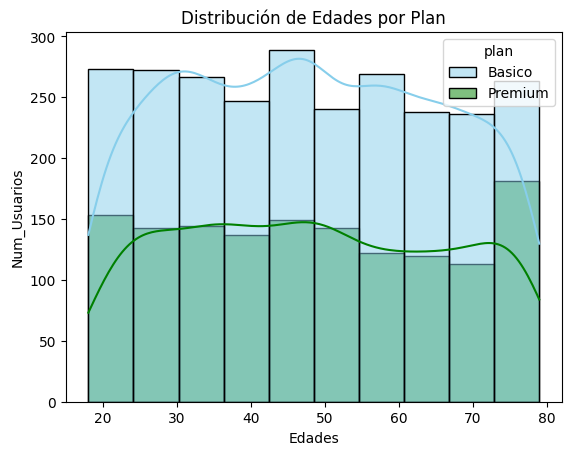

In [36]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='age', hue='plan', bins=10, palette=['skyblue','green'], kde=True)
plt.xlabel('Edades')
plt.ylabel('Num_Usuarios')
plt.title('Distribución de Edades por Plan')
plt.show()

💡Insights: 
- La distribución de edades es relativamente simetrica en ambos planes, con una mayor concentración general de usuarios en el plan Básico a lo largo de todos los rangos de edad. Sin embargo, en el segmento de usuarios mayores a 70 años se observa un incremento relativo en la proporción de clientes Premium, lo que podría indicar una mayor adopción de este plan en edades avanzadas.

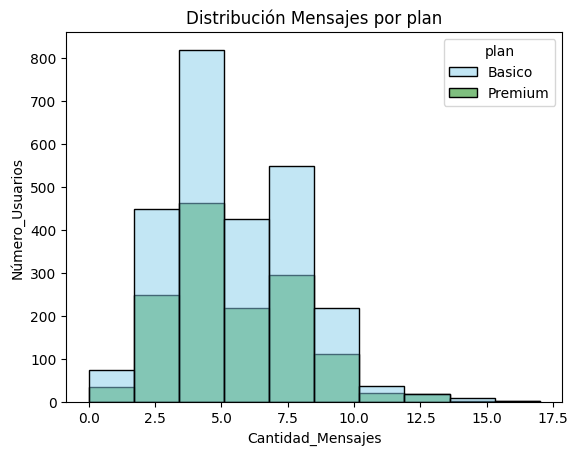

In [31]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes' , hue='plan', bins=10, palette=['skyblue','green'])
plt.xlabel('Cantidad_Mensajes')
plt.ylabel('Número_Usuarios')
plt.title('Distribución Mensajes por plan')
plt.show()

💡Insights: 
- La distribución de la cantidad de mensajes presenta un sesgo a la derecha, concentrándose la mayoría de los usuarios entre 2 y 10 mensajes enviados. Ambos planes muestran un patrón de uso similar; sin embargo, el plan Básico concentra un mayor volumen total de usuarios, mientras que el plan Premium presenta una ligera mayor presencia en rangos de envío más altos.

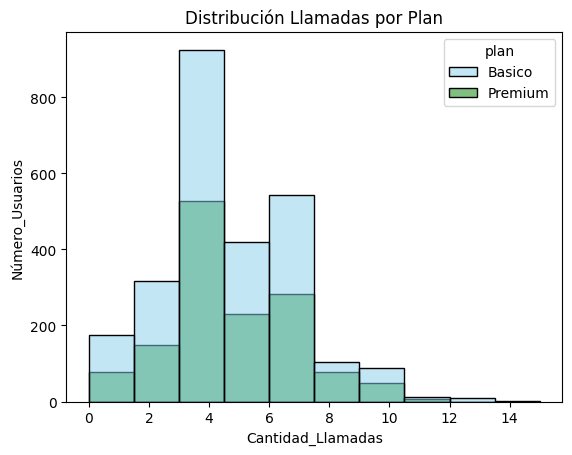

In [32]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas' , hue='plan', bins=10, palette=['skyblue','green'])
plt.xlabel('Cantidad_Llamadas')
plt.ylabel('Número_Usuarios')
plt.title('Distribución Llamadas por Plan')
plt.show()

💡Insights: 
- La cantidad de llamadas presenta una distribución con sesgo a la derecha, concentrándose la mayor frecuencia de usuarios entre 3 y 5 llamadas. Ambos planes muestran un patrón de uso similar; sin embargo, el plan Básico concentra un mayor volumen total de usuarios, mientras que el plan Premium muestra una ligera mayor presencia en rangos de llamadas más altos.

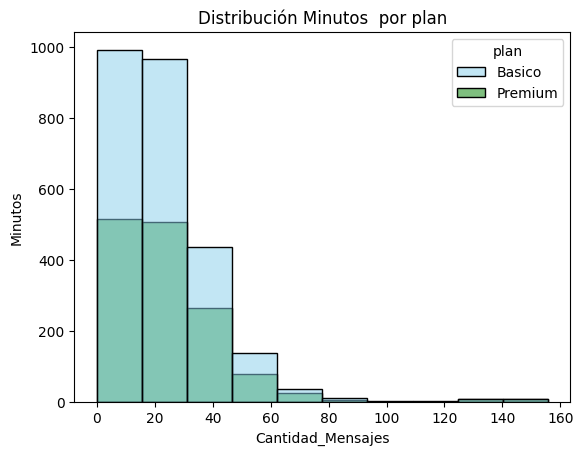

In [45]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada' , hue='plan', bins=10, palette=['skyblue','green'])
plt.xlabel('Cantidad_Mensajes')
plt.ylabel('Minutos')
plt.title('Distribución Minutos  por plan')
plt.show()

💡Insights: 
- La cantidad de minutos por plan presenta una distribución con sesgo a la derecha, concentrándose la mayor frecuencia de usuarios hasta 60 minutos por llamada. Ambos planes muestran un patrón de uso similar; sin embargo, el plan Premium concentra un mayor volumen total de usuarios, y a partir de los 60 min en adelante es el plan premium el que cuenta con un mayor numero de usuarios

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

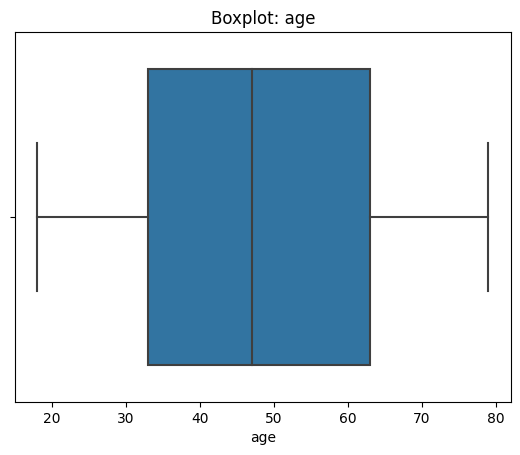

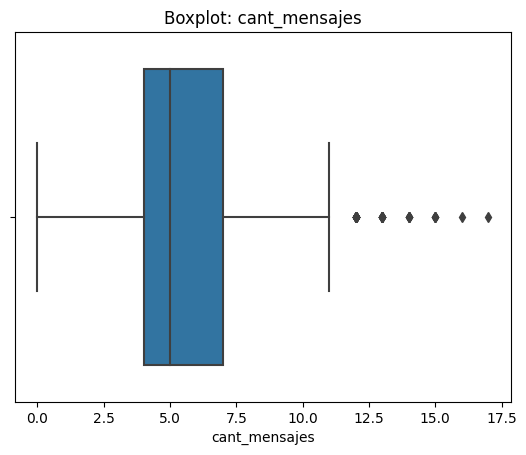

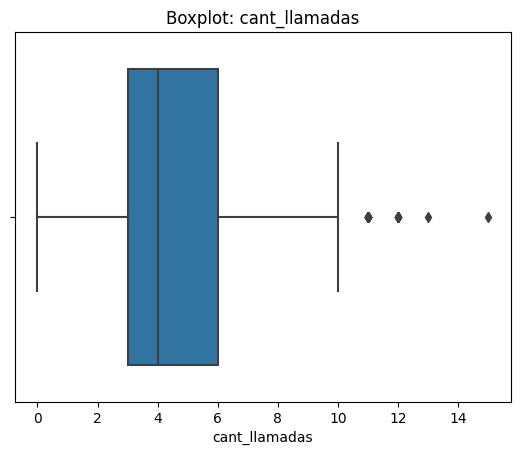

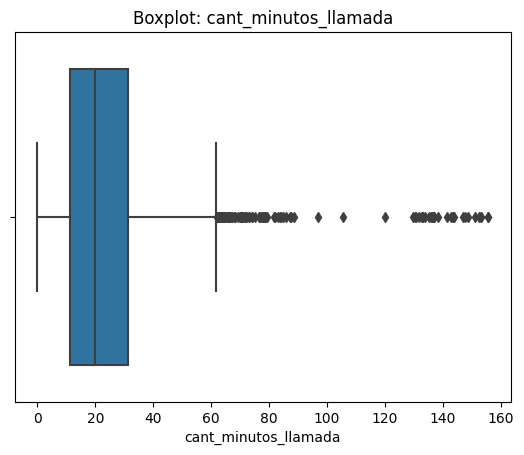

In [46]:
# Visualizando usando BoxPlot 

columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(data=user_profile, x=col)
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights: 
- Age: Noo presenta outliers con una median(Q2) de 48 años 
- cant_mensajes:Presenta valores atipicos leves asi como outliers 
- cant_llamadas:Presenta valores atipicos leves y un valor que podria representar un Outlier
- cant_minutos_llamada: Es la columna con mayor numero de outliers y valores atipicos

In [48]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
for col in columnas_limites:    
    print(f'Rango intercuartílico {col}')
#calcular Q1
    Q1 = user_profile[col].quantile(0.25)
    print('Primer cuartil: ', Q1)
#calcular Q3
    Q3 = user_profile[col].quantile(0.75)
    print('Tercer cuartil: ', Q3)
#calcular IQR
    IQR = Q3 - Q1
    print('IQR: ', IQR)
    print()

Rango intercuartílico cant_mensajes
Primer cuartil:  4.0
Tercer cuartil:  7.0
IQR:  3.0

Rango intercuartílico cant_llamadas
Primer cuartil:  3.0
Tercer cuartil:  6.0
IQR:  3.0

Rango intercuartílico cant_minutos_llamada
Primer cuartil:  11.12
Tercer cuartil:  31.415
IQR:  20.295



In [49]:

# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()


,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 

**cant_mensajes**
- Mantener outliers, por que Existen usuarios con un nivel de mensajería significativamente mayor al promedio, lo que puede indicar perfiles intensivos o segmentos premium.
  
**cant_llamadas**
- Mantener outliers, por que hay outliers claros sin embargo, 15 llamadas sigue siendo realista adicional no rompe la escala ni distorsiona la media severamente
 
**cant_minutos_llamada**
- Mantener outliers, por que existe un grupo reducido de usuarios con tiempos de llamada altos, que pueden corresponder a usos corporativos, errores de registro o comportamientos atípicos se debe documentar y analizar como segmento especial

### 6.3 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.
Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [51]:
# Crear columna grupo_uso
def clientes_uso(row):
    llamadas = row['cant_llamadas']
    mensajes = row['cant_mensajes']

    # Manejo de valores nulos
    if pd.isna(llamadas) or pd.isna(mensajes):
        return "Error en Datos"

    # Segmentación (orden correcto)
    if llamadas < 5 and mensajes < 5:
        return "Bajo uso"
    elif llamadas < 10 and mensajes < 10:
        return "Uso medio"
    else:
        return "Alto uso"

# aplicar función y ver cambios
user_profile["grupo_uso"] = user_profile.apply(clientes_uso, axis=1)

In [52]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,year_id,grupo_uso
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,2022,Uso medio
1,10001,5,10,33.18,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,2022,Alto uso
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2022,Uso medio
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,2022,Alto uso
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,2022,Bajo uso


### 6.4 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [55]:
# Crear columna grupo_edad
def clientes_edad(row):
    edad = row['age']

    # Manejo de valores nulos
    if pd.isna(edad):
        return "Error en Datos"

    # Segmentación 
    if edad < 30:
        return "Joven"
    elif edad < 60:
        return "Adulto"
    else:
        return "Adulto Mayor"

# aplicar función y ver cambios
user_profile["grupo_edad"] = user_profile.apply(clientes_edad, axis=1)

In [56]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,year_id,grupo_uso,grupo_edad
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,2022,Uso medio,Adulto
1,10001,5,10,33.18,Mateo,Torres,53.0,NA,2022-01-01 06:34:17.914478619,Basico,NaN,2022,Alto uso,Adulto
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,2022,Uso medio,Adulto
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,2022,Alto uso,Adulto Mayor
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,2022,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

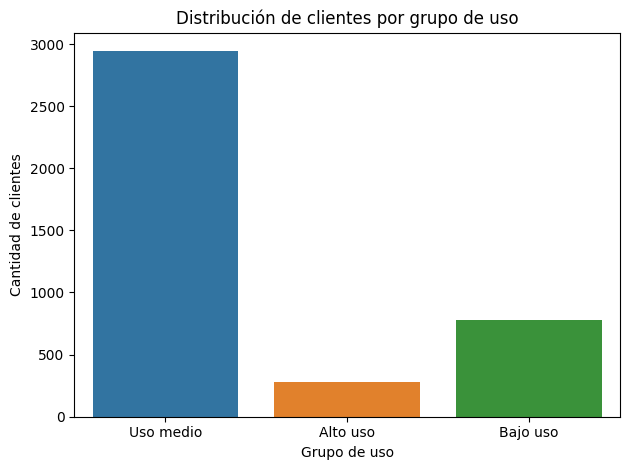

Uso medio    73.6
Bajo uso     19.5
Alto uso      7.0
Name: grupo_uso, dtype: float64


In [59]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso')
plt.title('Distribución de clientes por grupo de uso')
plt.xlabel('Grupo de uso')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()

porcentajes = (
    user_profile['grupo_uso']
    .value_counts(normalize=True) * 100
).round(1)

print(porcentajes)

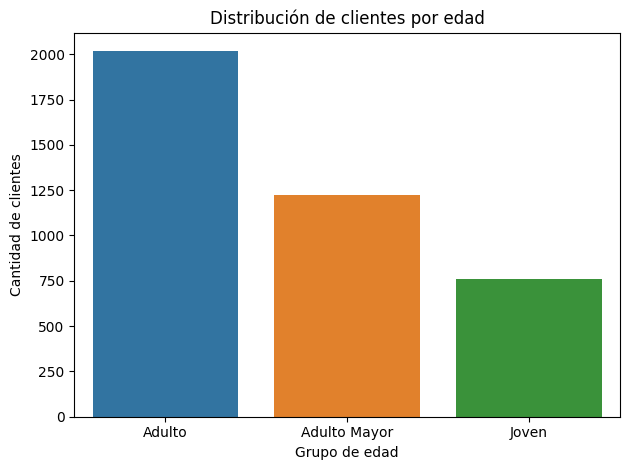

Adulto          50.4
Adulto Mayor    30.6
Joven           19.0
Name: grupo_edad, dtype: float64


In [60]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad')
plt.title('Distribución de clientes por edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()

porcentajes = (
    user_profile['grupo_edad']
    .value_counts(normalize=True) * 100
).round(1)

print(porcentajes)


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Durante la exploración inicial se identificaron problemas de calidad relevantes en las tablas Users y Usage, principalmente relacionados con valores nulos y datos inválidos.

**Users**
City: 469 registros nulos (11%)
Churn date: 3,534 registros nulos (88%)
El alto porcentaje de valores nulos en Churn date es consistente con clientes activos y no se considera un error crítico.

**Usage**
Date: 50 registros nulos (1%)
Duration: 22,076 registros nulos (55%)
Length: 17,896 registros nulos (44%)


**Acciones de limpieza realizadas**
Eliminación de valores centinela:
age = -999
city = '?'
Estandarización de la columna Date, a partir de la cual se extrajo el año
Eliminación de años inválidos (ej. 2026)
- Estas acciones permitieron asegurar consistencia y confiabilidad para el análisis posterior.

🔍 **Segmentos por Edad**
- El segmento de Adultos (30 a 60 años) concentra la mayor proporción de clientes con 50.4%
- Le sigue el segmento de Adultos mayores con 30.6%
- El segmento con menor participación es el de Jóvenes, con 19.0%
- Adicionalmente, se observa que:
El segmento de Adultos mayores presenta una mayor propensión a contratar paquetes Premium, lo que sugiere un mayor valor por cliente dentro de este grupo.


📊 **Segmentos por Nivel de Uso**
- La clasificación de clientes según su nivel de uso muestra la siguiente distribución:
Uso Medio: 73.6%
Uso Bajo: 19.5%
Alto Uso: 7.0%
- Esto sugiere que la mayoría de los clientes mantiene un uso moderado del servicio, mientras que el segmento de alto uso representa un grupo reducido pero potencialmente estratégico por su mayor intensidad de consumo.


➡️ Esto sugiere que ...

- La base de clientes está dominada por usuarios adultos con patrones de uso medio, lo que indica estabilidad en el comportamiento general.
- Existe un segmento pequeño pero relevante de alto uso, que podría estar asociado a mayor ingreso promedio o a necesidades específicas (uso intensivo).
- Los adultos mayores, aunque no son el grupo más numeroso, muestran mayor afinidad hacia productos Premium, representando una oportunidad de monetización.
- Los problemas de datos en la tabla Usage sugieren posibles fallas en la captura o registro del consumo, lo cual debe considerarse para análisis futuros.

💡 **Recomendaciones**
Estrategia comercial diferenciada
- Diseñar ofertas específicas para el segmento de Uso Medio, enfocadas en retención y upselling gradual.
- Crear planes o beneficios exclusivos para el segmento de Alto Uso, priorizando fidelización.

Enfoque en adultos mayores
- Potenciar paquetes Premium dirigidos a este segmento, resaltando estabilidad, servicio y beneficios de largo plazo.

Mejora en calidad de datos
- Revisar los procesos de captura de información en las columnas Duration y Length.
- Implementar validaciones para evitar valores centinela e inconsistencias en fechas.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`